# Support Vector Machine
Date: June 10, 2018 <br>
Author: Kexuan Zou

## Linear SVM

In [4]:
import sys
sys.path.append('../')
from svm.LinearSVC import LinearSVC
import util

train_x, train_y, test_x, test_y = util.load_iris()
model = LinearSVC(batch_size=1)
model.fit(train_x, train_y)
pred = model.predict(test_x)
cm = util.confusion_matrix(test_y, pred)
print("Weight", model.w)
print("Confusion matrix")
print(cm)
print("Accuracy", util.accuracy(cm))

Weight [-0.075      -0.24166667 -0.22833333  0.2575      0.19083333]
Confusion matrix
[[11  0  0]
 [ 0 11  0]
 [ 0  8  0]]
Accuracy 0.7333333333333333


## Kernel SVM

Confusion matrix
[[11  0]
 [ 1  8]]
Accuracy 0.95


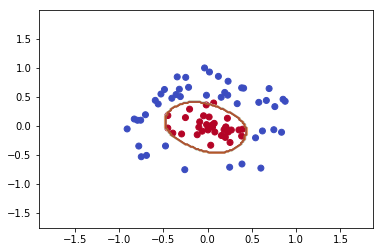

In [2]:
import sys
sys.path.append('../')
import numpy as np
from svm.SVC import SVC
import matplotlib.pyplot as plt
import util

train_x, train_y, test_x, test_y = util.load_rbf()
model = SVC(kernel="rbf", gamma=5, decision_function_shape="ovo")
model.fit(train_x, train_y)
pred = model.predict(test_x)
cm = util.confusion_matrix(test_y, pred)
print("Confusion matrix")
print(cm)
print("Accuracy", util.accuracy(cm))

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=plt.cm.coolwarm)

In [8]:
import sys
sys.path.append('../')
from svm.SVC import SVC
import util

train_x, train_y, test_x, test_y = util.load_iris()
model = SVC(kernel="rbf", gamma=0.8)
model.fit(train_x, train_y)
pred = model.predict(test_x)
cm = util.confusion_matrix(test_y, pred)
print("Confusion matrix")
print(cm)
print("Accuracy", util.accuracy(cm))
print("Number of support vectors", model.sv_x.shape[0])

Confusion matrix
[[ 8  0  0]
 [ 0  8  2]
 [ 0  0 12]]
Accuracy 0.9333333333333333
Number of support vectors 43
